In [147]:
from __future__ import print_function, division, absolute_import
import pandas as pd
import numpy as np

import string

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
pd.set_option('display.max_columns',None)

In [2]:
def remove_punctuation(text):
    return text.translate(None, string.punctuation)

In [31]:
def get_numpy_array(data, feature_x, feature_y ):
    data['ones'] = 1
    x = data[['ones'] + feature_x].as_matrix()
    y = data[feature_y].as_matrix()
    return x, y

In [4]:
products = pd.read_csv('amazon_baby_subset.csv', index_col=None)

In [6]:
important_words = pd.read_json('important_words.json')

In [7]:
important_words.head()

,0
0,baby
1,one
2,great
3,love
4,use


In [8]:
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [9]:
products.review.fillna('', inplace=True)

In [10]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [11]:
products.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...


In [17]:
## counting the occurance of important words in clean review
for iw in important_words[0].values:
    products[iw] = products.review_clean.apply(lambda c : c.split(' ').count(iw))

In [22]:
products.head(1)

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,two,using,got,fit,around,diaper,enough,month,price,go,could,soft,since,buy,room,works,made,child,keep,size,small,need,year,big,make,take,easily,think,crib,clean,way,quality,thing,better,without,set,new,every,cute,best,bottles,work,purchased,right,lot,side,happy,comfortable,toy,able,kids,bit,night,long,fits,see,us,another,play,day,money,monitor,tried,thought,never,item,hard,plastic,however,disappointed,reviews,something,going,pump,bottle,cup,waste,return,amazon,different,top,want,problem,know,water,try,received,sure,times,chair,find,hold,gate,open,bottom,away,actually,cheap,worked,getting,ordered,came,milk,bad,part,worth,found,cover,many,design,looking,weeks,say,wanted,look,place,purchase,looks,second,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
train_index = pd.read_json('module-4-assignment-train-idx.json')[0].values

In [24]:
valid_index = pd.read_json('module-4-assignment-validation-idx.json')[0].values

In [30]:
train_data = products.iloc[train_index]
valid_data = products.iloc[valid_index]

In [42]:
feature_matrix_train, sentiment_train = get_numpy_array(train_data, important_words[0].values.tolist(), 'sentiment')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
feature_matrix_valid, sentiment_valid = get_numpy_array(valid_data, important_words[0].values.tolist(), 'sentiment')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
def get_probability(x, w):
    return 1/(1 + np.exp(-x.dot(w)))

In [58]:
def get_indicator_value(y):
    return  y == 1

In [79]:
def get_error(x, y, w):
    return (get_indicator_value(y) - get_probability(x,w))

In [76]:
def get_gradient(x, y, initial_coefficient, l2_penalty):
    error = get_error(x,y, initial_coefficient)
    grad  = (x.T).dot(error)
    l2_term = l2_penalty*initial_coefficient[1:]
    grad[1:] = grad[1:] - 2*l2_term
    return grad

In [85]:
def get_log_likelihood(x, y, initial_coefficients, l2_penalty):
    indicator = get_indicator_value(y)
    ll = (indicator - 1).dot((x.dot(initial_coefficients).T)) - sum(np.log(1 + np.exp(-x.dot(initial_coefficients))))
    ll = ll - l2_penalty*(initial_coefficients.dot(initial_coefficients.T))
                             
    return ll

In [106]:
def logistics_regression_with_l2(feature_matrix, sentiment, intial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = intial_coefficients
    ll = [get_log_likelihood(feature_matrix, sentiment, intial_coefficients, l2_penalty)]
    
    for i in range(max_iter):
        grad = get_gradient(feature_matrix, sentiment, coefficients, l2_penalty)
        coefficients = coefficients + step_size*grad
        ll.append(get_log_likelihood(feature_matrix, sentiment, coefficients, l2_penalty))
        if i % 50 ==0:
            print(ll[i])
    return coefficients

In [104]:
l2_penalty = [0, 4, 10, 1e2, 1e3, 1e5]
initial_coefficients = np.zeros(feature_matrix_train.shape[1])
step_size = 5e-6
max_iter = 501

In [109]:
coefficients_0_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[0], max_iter)
print("First Compelted")
coefficients_4_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[1], max_iter)
print("Second Compelted")
coefficients_10_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[2], max_iter)
print("Third Compelted")
coefficients_1e2_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[3], max_iter)
print("Fourth Compelted")
coefficients_1e3_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[4], max_iter)
print("Fifth Compelted")
coefficients_1e5_penalty = logistics_regression_with_l2(feature_matrix_train, sentiment_train, initial_coefficients, 
                                                      step_size, l2_penalty[5], max_iter)
print("Sixth Compelted")

-29362.4077157
-24559.6802358
-22818.9540347
-21885.1749373
-21292.9724952
-20880.780778
-20576.2598092
-20341.7477234
-20155.5476972
-20004.207918
-19878.9086615
First Compelted
-29362.4077157
-24567.3565756
-22837.2832581
-21913.5979537
-21330.645708
-20926.9063632
-20630.1322616
-20402.7503937
-20223.1402779
-20077.913939
-19958.3048871
Second Compelted
-29362.4077157
-24578.8361767
-22864.6140126
-21955.8595741
-21386.5062206
-20995.114498
-20709.5847376
-20492.4848515
-20322.315121
-20185.7885269
-20074.2228193
Third Compelted
-29362.4077157
-24746.1218138
-23252.2078526
-22539.8997679
-22139.6853629
-21893.4239098
-21732.8091851
-21623.7180945
-21547.3785489
-21492.7253841
-21452.8889559
Fourth Compelted
-29362.4077157
-26013.908939
-25617.7940143
-25549.9863019
-25536.3366016
-25533.3053511
-25532.5839042
-25532.4030627
-25532.3559042
-25532.3432269
-25532.3397374
Fifth Compelted
-29362.4077157
-29281.9861264
-29283.9021759
-29284.070186
-29284.0843152
-29284.0854993
-29284.0855

In [112]:
coefficients_table = pd.DataFrame({'words':important_words[0].values, 'cofficent_0':coefficients_0_penalty[1:],
                                 'coefficient_4': coefficients_4_penalty[1:], 'coefficient_10': coefficients_10_penalty[1:],
                                 'coefficient_1e2': coefficients_1e2_penalty[1:], 'coefficient_1e3': coefficients_1e3_penalty[1:],
                                 'cofficient_1e5': coefficients_1e5_penalty[1:]})

In [114]:
coefficients_table = coefficients_table[['words','cofficent_0', 'coefficient_4', 'coefficient_10', 'coefficient_1e2',
                                      'coefficient_1e3', 'cofficient_1e5'  ]]

In [118]:
coefficients_table.sort_values('cofficent_0', inplace=True)

In [130]:
print("Most Negative Words")
coefficients_table.head(5)['words'].values.tolist()

Most Negative Words


[u'disappointed', u'money', u'return', u'waste', u'returned']

In [129]:
print("Most Positive Words")
coefficients_table.tail(5)['words'].values.tolist()

Most Positive Words


[u'great', u'perfect', u'easy', u'loves', u'love']

In [131]:
selected_words = coefficients_table.head(5)['words'].values.tolist() + coefficients_table.tail(5)['words'].values.tolist()

In [132]:
selected_words

[u'disappointed',
 u'money',
 u'return',
 u'waste',
 u'returned',
 u'great',
 u'perfect',
 u'easy',
 u'loves',
 u'love']

In [134]:
coefficients_needed = coefficients_table[coefficients_table.words.isin(selected_words)]

In [135]:
coefficients_needed

,words,cofficent_0,coefficient_4,coefficient_10,coefficient_1e2,coefficient_1e3,cofficient_1e5
105,disappointed,-0.955437,-0.946980,-0.934518,-0.775625,-0.266095,-0.004013
96,money,-0.768793,-0.762734,-0.753818,-0.641406,-0.275883,-0.005487
113,return,-0.742085,-0.735502,-0.725807,-0.602646,-0.215199,-0.003730
112,waste,-0.617809,-0.612475,-0.604620,-0.505189,-0.190631,-0.003345
168,returned,-0.572707,-0.567518,-0.559870,-0.462056,-0.150021,-0.002225
2,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
33,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
7,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
22,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
3,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042


In [152]:
coefficients_needed[coefficients_needed.words == 'disappointed'].ix[:,1:].as_matrix().T.shape

(6L, 1L)

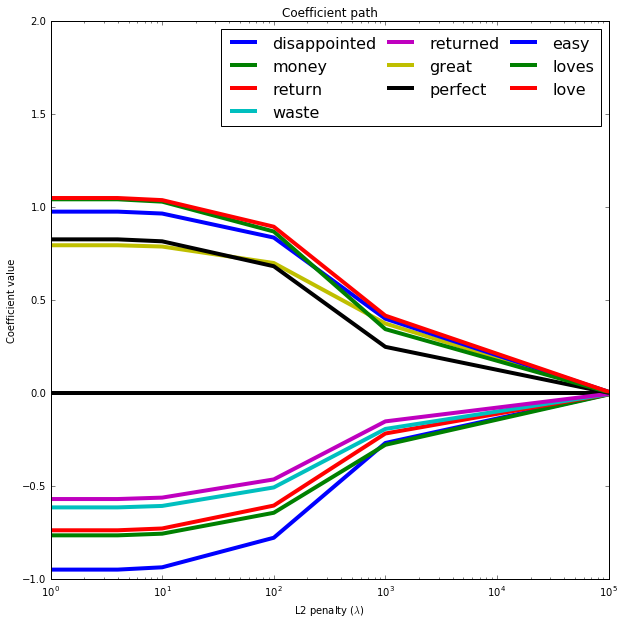

In [174]:
plt.rcParams['figure.figsize'] = 10, 10
plt.plot([1,1e5],[0,0], 'k-', linewidth=4.0)
for w in coefficients_needed.words:
    plt.plot(l2_penalty, coefficients_needed[coefficients_needed.words == w].ix[:,1:].as_matrix().T,'-',
             label=w, linewidth = 4.0)
plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
plt.axis([1, 1e5, -1, 2])
plt.title('Coefficient path')
plt.xlabel('L2 penalty ($\lambda$)')
plt.ylabel('Coefficient value')
plt.xscale('log')
plt.show()

In [179]:
def get_accuracy(x,w,y):
    pred = np.where(x.dot(w) >0,1,0)
    return pred[y == pred].shape[0]/y.shape[0]
#     return pred[y==pred].shape[0]/y.shape[0]

In [177]:
p = get_accuracy(feature_matrix_train, coefficients_0_penalty, sentiment_train)

In [186]:
p[p==sentiment_train].shape[0]/sentiment_train.shape[0]

0.38610986520620383

In [182]:
accuracy_0_train = get_accuracy(feature_matrix_train, coefficients_0_penalty, sentiment_train)

accuracy_4_train = get_accuracy(feature_matrix_train, coefficients_4_penalty, sentiment_train)

accuracy_10_train = get_accuracy(feature_matrix_train, coefficients_10_penalty, sentiment_train)

accuracy_1e2_train = get_accuracy(feature_matrix_train, coefficients_1e2_penalty, sentiment_train)

accuracy_1e3_train = get_accuracy(feature_matrix_train, coefficients_1e3_penalty, sentiment_train)

accuracy_1e5_train = get_accuracy(feature_matrix_train, coefficients_1e5_penalty, sentiment_train)


In [183]:
print(accuracy_0_train,'\n', accuracy_4_train,'\n', accuracy_10_train,'\n', accuracy_1e2_train,' \n', accuracy_1e3_train,' \n',
      accuracy_1e5_train)

0.386109865206 
 0.386086258587 
 0.386015438729 
 0.385260026912  
 0.388942659522  
 0.44970609759


In [184]:
accuracy_0_valid = get_accuracy(feature_matrix_valid, coefficients_0_penalty, sentiment_valid)

accuracy_4_valid = get_accuracy(feature_matrix_valid, coefficients_4_penalty, sentiment_valid)

accuracy_10_valid = get_accuracy(feature_matrix_valid, coefficients_10_penalty, sentiment_valid)

accuracy_1e2_valid = get_accuracy(feature_matrix_valid, coefficients_1e2_penalty, sentiment_valid)

accuracy_1e3_valid = get_accuracy(feature_matrix_valid, coefficients_1e3_penalty, sentiment_valid)

accuracy_1e5_valid = get_accuracy(feature_matrix_valid, coefficients_1e5_penalty, sentiment_valid)

In [185]:
print(accuracy_0_valid,'\n', accuracy_4_valid,'\n', accuracy_10_valid,'\n', accuracy_1e2_valid,' \n', accuracy_1e3_valid,' \n',
      accuracy_1e5_valid)

0.382410605919 
 0.382410605919 
 0.382410605919 
 0.381850434133  
 0.388105685744  
 0.445149845953
